# Importing Libraries

In [1]:
import pandas as pd
from pandas_datareader import data #will be used to download data from yahoo finance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
from scipy.stats import pearsonr
from scipy.stats import ttest_ind #Independent Sample T-test
from scipy.stats import f_oneway #One-Way ANOVA
init_notebook_mode(connected=True)

# Problem 2.1

In [2]:
data=pd.read_excel('StudentsPerformance_Data.xlsx',sheet_name='FinalData')

# Problem 2.2

In [3]:
#checking for missing values
data.isnull().any()

Student_ID                 False
race/ethnicity             False
Parents_Education          False
lunch                      False
test preparation course    False
gender                     False
Math_Score_Value            True
Writing_Score_Value        False
Reading_Score_Value         True
Rank                        True
dtype: bool

In [4]:
#dropping missing values
data.dropna(inplace=True)

In [5]:
#making sure missing values are dropped
data.isna().sum()

Student_ID                 0
race/ethnicity             0
Parents_Education          0
lunch                      0
test preparation course    0
gender                     0
Math_Score_Value           0
Writing_Score_Value        0
Reading_Score_Value        0
Rank                       0
dtype: int64

# Problem 2.3

In [6]:
#dropping a column
data.drop("lunch",axis=1,inplace=True) 

In [7]:
#making sure the column is dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 3 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               997 non-null    int64  
 1   race/ethnicity           997 non-null    object 
 2   Parents_Education        997 non-null    object 
 3   test preparation course  997 non-null    object 
 4   gender                   997 non-null    object 
 5   Math_Score_Value         997 non-null    float64
 6   Writing_Score_Value      997 non-null    int64  
 7   Reading_Score_Value      997 non-null    float64
 8   Rank                     997 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 77.9+ KB


# Problem 2.4

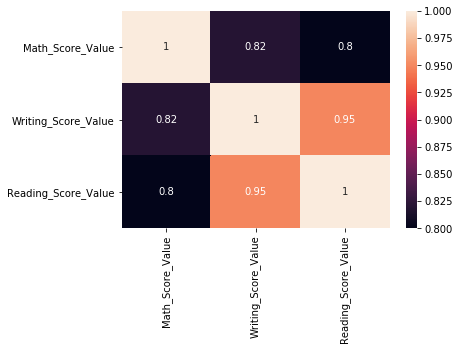

In [8]:
#checking for correlations visually
sns.heatmap(data[["Math_Score_Value","Writing_Score_Value","Reading_Score_Value"]].corr().abs().round(2),annot=True)
plt.show()

**<font size=3 color='#0025cc'> The heatmap above shows that writing and reading scores have the highest correlation which is expected. </font>**

# Problem 2.5

In [9]:
#default agg function is mean
pd.pivot_table(data, values="Math_Score_Value", index=['race/ethnicity'], columns=['gender'])

gender,female,male
race/ethnicity,,
group A,58.527778,63.735849
group B,61.403846,66.223529
group C,62.217877,67.775362
group D,65.248062,69.413534
group E,70.811594,76.746479


# Problem 2.6

In [10]:
round(data.groupby('gender')['Reading_Score_Value'].mean(),2)

gender
female    72.55
male      63.40
Name: Reading_Score_Value, dtype: float64

In [11]:
round(data.groupby('gender')['Reading_Score_Value'].median(),2)

gender
female    74.0
male      64.0
Name: Reading_Score_Value, dtype: float64

**<font size=3 color='#0025cc'> Female students performance on reading test was higher compared to males. </font>**

# Problem 2.7

In [12]:
fig = go.Figure(data=[
    go.Bar(x=data.groupby("race/ethnicity")['Reading_Score_Value'].mean().index,
           y=data.groupby("race/ethnicity")['Reading_Score_Value'].mean(),
           name='mean'),
    go.Bar(x=data.groupby("race/ethnicity")['Reading_Score_Value'].median().index,
          y=data.groupby("race/ethnicity")['Reading_Score_Value'].median(),
          name='median')
])

fig.update_layout(barmode='group',
                  title_text='Mean and Median Reading Scores by Race/Ethnicity')
fig.show()

**<font size=3 color='#0025cc'> On average, students in group E had higher performance on reading test. </font>**

# Problem 2.8

In [13]:
for i in data[["Math_Score_Value","Writing_Score_Value","Reading_Score_Value"]].columns:
    fig = go.Figure(data=[go.Histogram(x=data[i],
                                       marker_color='#330C73',
                                       nbinsx=12)])
    fig.update_layout(title_text=i)
    fig.show()

**<font size=3 color='#0025cc'> Almost in all cases,distribution of scores approximates to normal distribution. However, we can see that histograms are a little left skewed which indicates that in the database there are students outliers who received very low grades (therefore mean is less than median). </font>**

# Problem 2.9

### T-test

In [14]:
#Average math score by gender
round(data.groupby('gender')['Math_Score_Value'].mean(),2)

gender
female    63.70
male      68.84
Name: Math_Score_Value, dtype: float64

In [15]:
print(ttest_ind(data.Math_Score_Value[data['gender']=='male'],
         data.Math_Score_Value[data['gender']=='female']))

Ttest_indResult(statistic=5.440251544712536, pvalue=6.69827457503788e-08)


**<font size=3 color='#0025cc'> Since p-value is less than 0.05, we can report that average math score is statistically significantly different higher for male student compared to their female classmates. </font>**

### One-Way ANOVA test

In [16]:
#Average math score by gender
data['Parents_Education'].value_counts()

some college          225
associate's degree    222
high school           195
some high school      178
bachelor's degree     118
master's degree        59
Name: Parents_Education, dtype: int64

**<font size=3 color='#0025cc'> Before running ANOVA test, let's group some of the levels.</font>**

In [17]:
data['Parents_Education']=data['Parents_Education'].map({"high school":"School",
                                                        "some high school":"School",
                                                        "associate's degree":"College/Associate",
                                                        "some college":"College/Associate",
                                                        "bachelor's degree":"Bachelor/Master",
                                                        "master's degree":"Bachelor/Master"})

In [18]:
data.groupby('Parents_Education')["Math_Score_Value"].mean()

Parents_Education
Bachelor/Master      69.508475
College/Associate    67.561521
School               62.924933
Name: Math_Score_Value, dtype: float64

In [19]:
#Running the test
print(f_oneway(data.Math_Score_Value[data['Parents_Education']=="College/Associate"],
              data.Math_Score_Value[data['Parents_Education']=="School"],                      
              data.Math_Score_Value[data['Parents_Education']=="Bachelor/Master"]))

F_onewayResult(statistic=15.252988438705739, pvalue=2.98764054427481e-07)


**<font size=3 color='#0025cc'> ANOVA test indicates that math scores are statistically significantly different among students whose parents hold different degrees (p-value <0.05). </font>**

# Additional

In [20]:
data.groupby('gender')[["Math_Score_Value","Writing_Score_Value","Reading_Score_Value"]].mean()

,Math_Score_Value,Writing_Score_Value,Reading_Score_Value
gender,,,
female,63.700193,72.692456,72.549323
male,68.835417,65.556250,63.402083


In [21]:
data.groupby('race/ethnicity')[["Math_Score_Value","Writing_Score_Value","Reading_Score_Value"]].mean()

,Math_Score_Value,Writing_Score_Value,Reading_Score_Value
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.571429,67.502646,65.767196
group C,64.637224,69.283912,68.006309
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


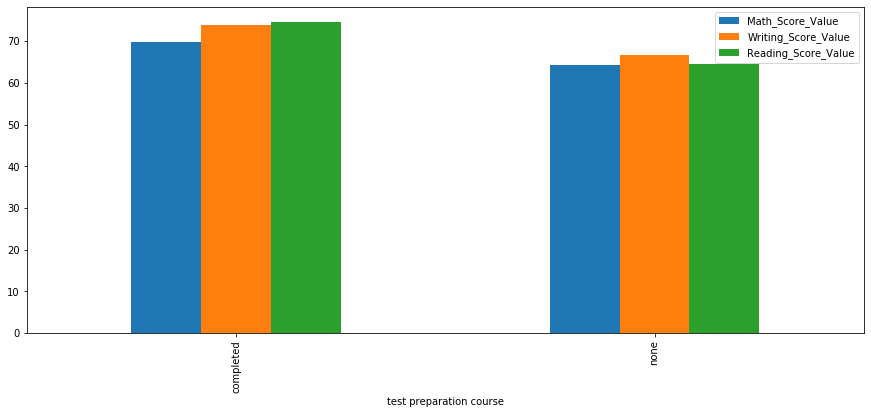

In [22]:
data.groupby('test preparation course')[["Math_Score_Value",
                                         "Writing_Score_Value",
                                         "Reading_Score_Value"]].mean().plot(kind='bar',figsize=(15,6))
plt.show()

# Problem 2.10

<b><font size=3 color='#0025cc'> Based on the analysis above, we can say that:
- On average, female students did better on reading and writing test, while male students on math test. For math test, the difference is statistically significant.
- Parents' education has significant relationsship with students' test performance, e.g. students whose parents' hold bachelor or masters degree on average received higher math scores compared to those students whose parents' education levels are lower.
- Students who belong to group E as their race/ethnicity on average received higher test scores.
- Students who completed any test preparation course did much better in their tests compared to those who didn't do any course.
</font></b>